# Examples for math_functions
    by Gerrit Nowald

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Polynomial fit
oop implementation of a polynomial fit using least squares.

In [2]:
from math_functions import polyfit

- input

In [3]:
N_data = 30   # number of data points
N      = 2    # polynomial order ( N << N_data )

- test data: cosine + noise

In [4]:
data_x = np.linspace(-2,2,N_data)
data_y = np.cos(data_x)
data_y += 0.2*(np.random.rand(np.shape(data_x)[0])-0.5)   # adding noise

- create polyfit object

In [5]:
p1 = polyfit(data_x, data_y, N)

polynomial: f(x) = -0.368*x**2 +0.0113*x +0.948


- comparison of polynomial coefficients with NumPy

In [6]:
coeff_np  = np.polyfit(data_x, data_y, N)
print(f'max. difference coefficients: {max(abs(p1.coeff-coeff_np))}')

max. difference coefficients: 1.1102230246251565e-16


- plot

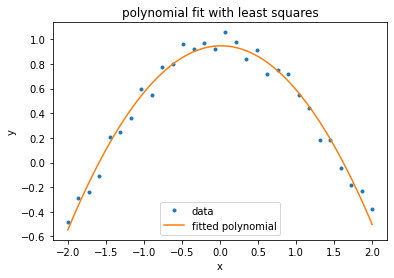

In [7]:
plot_x = np.linspace(-2,2,100)
plot_y = p1(plot_x)

plt.plot(data_x, data_y, '.', label='data')
plt.plot(plot_x, plot_y, label='fitted polynomial')
plt.legend()
plt.title('polynomial fit with least squares')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Linear inter- & extrapolation
1D linear inter- and extrapolation, multiple y-data possible.

credit to [Loren Shure (The MathWorks)](http://blogs.mathworks.com/loren/2008/08/25/piecewise-linear-interpolation/) and [Jose M. Mier](https://de.mathworks.com/matlabcentral/fileexchange/43325-quicker-1d-linear-interpolation-interp1qr)

In [8]:
from math_functions import interpextraplin

- input

In [9]:
Nx  = 5   # number of data points
Nxi = 3   # number of query points

- test data

In [18]:
x = np.linspace(0,800,Nx)
y = x**3/1e3
# y = np.column_stack(( x**2, x**3/1e3))  # does not work for np.interp

xi = np.linspace(-50,900,Nxi)

- interpolation

In [19]:
yi    = interpextraplin(x,y,xi)
yi_np = np.interp(xi, x, y)

- plot

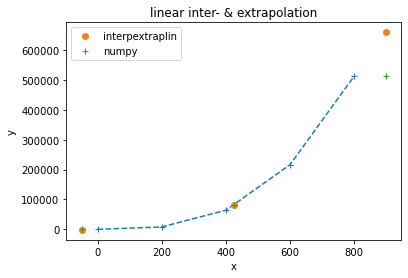

In [20]:
plt.plot(x,y,'--+')
plt.plot(xi,yi,'o',label='interpextraplin')
plt.plot(xi,yi_np,'+',label='numpy')
plt.legend()
plt.title('linear inter- & extrapolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()